In [1]:
import xarray as xr
import xesmf as xe

import pop_tools

In [2]:
dst_grid = 'POP_gx1v6'
src_file_in = 'data/esm26_lme_mask_onedeg.nc'
src_varname = 'lme_mask'

dst_file_out = f'data/LME-mask-{dst_grid}.nc'

In [3]:
dst_data = pop_tools.get_grid(dst_grid)[['TLAT', 'TLONG', 'KMT', 'TAREA']]
dst_data = dst_data.rename({'TLAT': 'lat', 'TLONG': 'lon'})
dst_data

/glade/work/mclong/miniconda3/envs/fish-offline/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Dimensions without coordinates: nlat, nlon
Data variables:
    lat      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    lon      (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    KMT      (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    TAREA    (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.431e+12 7.432e+12
Attributes:
    lateral_dims:       [384, 320]
    vertical_dims:      60
    vert_grid_file:     gx1v7_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ieeer8
    topography_fname:   inputdata/ocn/pop/gx1v6/grid/topography_20090204.ieeei4
    region_mask_fname:  inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.ieeei4
    type:               dipole
    title:              POP_gx1v6 grid

In [4]:
src_data = xr.open_dataset(src_file_in)
src_data = src_data.rename({'Lat': 'lat', 'Lon': 'lon'}).set_coords(['lat', 'lon'])
src_data

<xarray.Dataset>
Dimensions:   (x: 360, y: 180)
Coordinates:
    lat       (x, y) float64 ...
    lon       (x, y) float64 ...
Dimensions without coordinates: x, y
Data variables:
    lme_mask  (x, y) float64 ...
Attributes:
    creation_date:  14-May-2021 13:35:42
    _FillValue:     1e+20

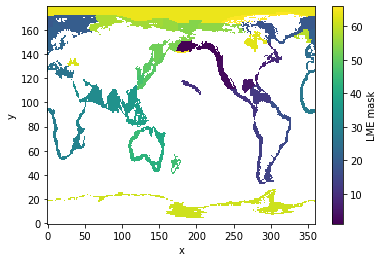

In [5]:
src_data[src_varname].T.plot()

In [7]:
regridder = xe.Regridder(src_data, dst_data, 'nearest_s2d')
ds_out = regridder(src_data).rename({'lat': 'TLAT', 'lon': 'TLONG'})
for v in ['KMT', 'TAREA']:
    ds_out[v] = dst_data[v]
ds_out

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320)
Coordinates:
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
Dimensions without coordinates: nlat, nlon
Data variables:
    lme_mask  (nlat, nlon) float64 61.0 61.0 61.0 61.0 61.0 ... nan nan nan nan
    KMT       (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.431e+12 7.432e+12
Attributes:
    regrid_method:  nearest_s2d

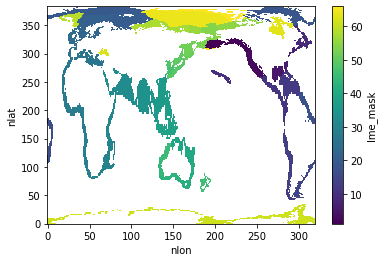

In [8]:
ds_out[src_varname].plot()

In [9]:
ds_out.to_netcdf(dst_file_out)